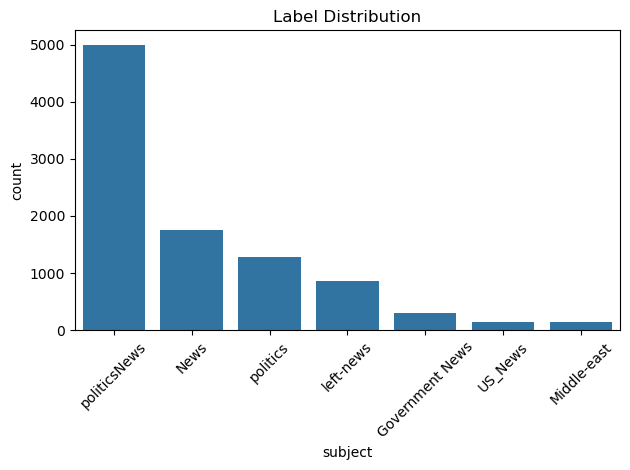

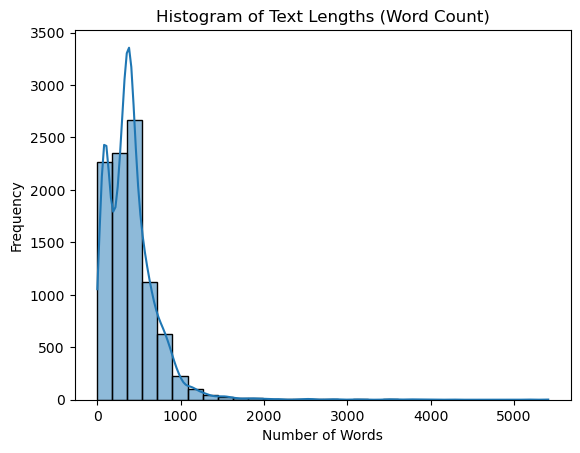

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Logistic Regression Accuracy: 0.9757639620653319
Logistic Regression Accuracy: 0.9757639620653319
Best Params (SVM): {'C': 1}
Best Accuracy (CV): 0.9884044074924244


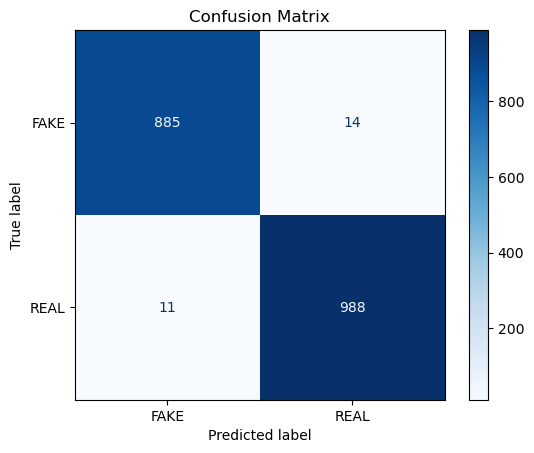

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99       899
        REAL       0.99      0.99      0.99       999

    accuracy                           0.99      1898
   macro avg       0.99      0.99      0.99      1898
weighted avg       0.99      0.99      0.99      1898



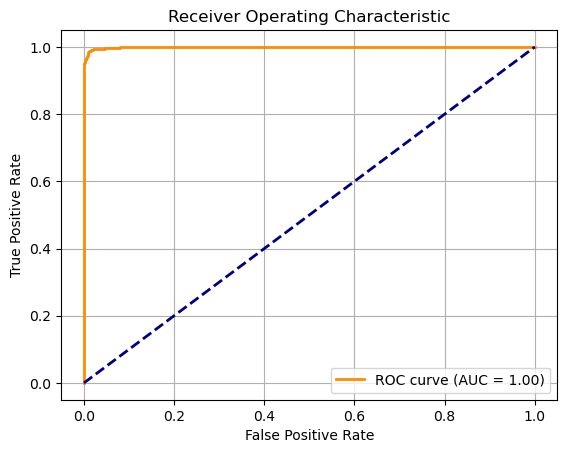

In [5]:

# Fake News Detection - Enhanced Notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Load dataset
df_fake = pd.read_csv("C:\\Users\\hp\\Desktop\\Sem 6\\AI\\Assignment\\Final_Fake_Reduced_Cleaned.csv", encoding="ISO-8859-1")
df_real = pd.read_csv("C:\\Users\\hp\\Desktop\\Sem 6\\AI\\Assignment\\true.csv", encoding="ISO-8859-1")

df_fake["label"] = "FAKE"
df_real["label"] = "REAL"

df = pd.concat([df_fake, df_real], ignore_index=True)

# Data Visualization
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index)
plt.title("Label Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df["text_len"] = df["text"].apply(lambda x: len(str(x).split()))
sns.histplot(df["text_len"], bins=30, kde=True)
plt.title("Histogram of Text Lengths (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Preprocessing and Cleaning
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].astype(str).apply(clean_text)

# Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Model Comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_accuracy = lr_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy:", model.score(X_test, y_test))

# Hyperparameter Tuning for SVM
params = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LinearSVC(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best Params (SVM):", grid.best_params_)
print("Best Accuracy (CV):", grid.best_score_)

# Confusion Matrix for Best Model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve for one-vs-rest
# Binarize the labels (0 for FAKE, 1 for REAL or vice versa depending on encoding)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # flatten to 1D
y_score = best_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



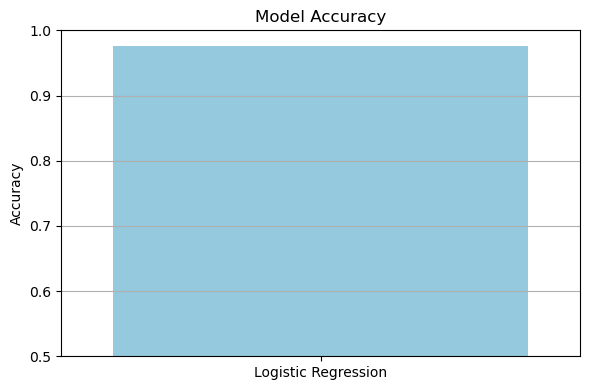

In [6]:
import seaborn as sns

# Bar chart with one bar
plt.figure(figsize=(6, 4))
sns.barplot(x=["Logistic Regression"], y=[lr_accuracy], color='skyblue')
plt.title("Model Accuracy")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 317, in fit
    self.coef_, self.interc

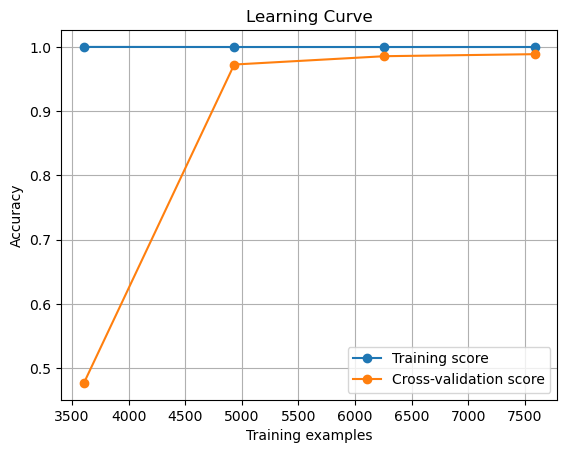

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.3, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc="best")
plt.show()
